<a href="https://colab.research.google.com/github/siddy09re/AutoLip-Real-time-Lip-Reading-model/blob/main/Final_year_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [ ]:

!pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
!pip install jiwer editdistance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt

In [ ]:
tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1dAK_OW6F8et5oXSbzSUChJ10iCDWHNrL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1dAK_OW6F8et5oXSbzSUChJ10iCDWHNrL
From (redirected): https://drive.google.com/uc?id=1dAK_OW6F8et5oXSbzSUChJ10iCDWHNrL&confirm=t&uuid=37c22c71-ec47-482b-9ccd-c32035e6f474
To: /content/data.zip
100%|██████████| 246M/246M [00:04<00:00, 56.7MB/s]


['data3/',
 'data3/alignment/',
 'data3/alignment/s1/',
 'data3/alignment/s1/bbab8n.align',
 'data3/alignment/s1/bbab9s.align',
 'data3/alignment/s1/bbac1a.align',
 'data3/alignment/s1/bbaczp.align',
 'data3/alignment/s1/bbad8n.align',
 'data3/alignment/s1/bbad9n.align',
 'data3/alignment/s1/bbad9s.align',
 'data3/alignment/s1/bbae1a.align',
 'data3/alignment/s1/bbae1n.align',
 'data3/alignment/s1/bbae1p.align',
 'data3/alignment/s1/bbae1s.align',
 'data3/alignment/s1/bbae2a.align',
 'data3/alignment/s1/bbae2n.align',
 'data3/alignment/s1/bbae2p.align',
 'data3/alignment/s1/bbae2s.align',
 'data3/alignment/s1/bbae3a.align',
 'data3/alignment/s1/bbae3p.align',
 'data3/alignment/s1/bbae3s.align',
 'data3/alignment/s1/bbae4a.align',
 'data3/alignment/s1/bbae4n.align',
 'data3/alignment/s1/bbae4p.align',
 'data3/alignment/s1/bbae5a.align',
 'data3/alignment/s1/bbae5n.align',
 'data3/alignment/s1/bbae5s.align',
 'data3/alignment/s1/bbae6n.align',
 'data3/alignment/s1/bbae6p.align',
 'data3/

In [ ]:
!wget -nd https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat


--2024-11-10 18:06:38--  https://github.com/JeffTrain/selfie/raw/master/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat [following]
--2024-11-10 18:06:39--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M   161MB/s    in 0.6s    

2024-11-10 18:06:42 (161 M

In [ ]:
# import dlib
# import cv2
# import tensorflow as tf
# from typing import List

# # Initialize dlib's face detector and facial landmarks predictor
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


# def load_video(path: str) -> List[float]:
#     cap = cv2.VideoCapture(path)
#     frames = []

#     for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
#         ret, frame = cap.read()

#         if not ret:
#             break

#         # Convert the frame to grayscale for dlib processing
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#         # Detect faces
#         faces = detector(gray)

#         if faces:
#             # Use the first detected face
#             face = faces[0]
#             landmarks = predictor(gray, face)

#             # Extract lip region using facial landmarks (points 48-67 correspond to lips)
#             lip_points = []
#             for i in range(48, 68):
#                 x = landmarks.part(i).x
#                 y = landmarks.part(i).y
#                 lip_points.append((x, y))

#             # Find the bounding box of the lips
#             x_min = min([point[0] for point in lip_points])
#             x_max = max([point[0] for point in lip_points])
#             y_min = min([point[1] for point in lip_points])
#             y_max = max([point[1] for point in lip_points])

#             # Crop the lip region
#             lip_frame = frame[y_min:y_max, x_min:x_max]
#             lip_frame = cv2.resize(lip_frame, (140, 46))  # Resize to a fixed size for consistency

#             # Convert to grayscale
#             lip_frame = tf.image.rgb_to_grayscale(lip_frame)
#             frames.append(lip_frame)

#     cap.release()

#     mean = tf.math.reduce_mean(frames)
#     std = tf.math.reduce_std(tf.cast(frames, tf.float32))

#     return tf.cast((frames - mean), tf.float32) / std


In [ ]:
import dlib
import cv2
import tensorflow as tf
from typing import List
import numpy as np

# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def load_video(path: str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    # frame_count = 0  # Initialize a frame counter

    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()

        if not ret:
          # print(f"Failed to read frame {frame_count} from video.")
          break

        # print(f"Processed frame {frame_count}")  # Debugging line
        # Convert the frame to grayscale for dlib processing
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = detector(gray)

        if faces:
            # Use the first detected face
            face = faces[0]
            landmarks = predictor(gray, face)

            # Extract lip region using facial landmarks (points 48-67 correspond to lips)
            lip_points = []
            for i in range(48, 68):
                x = landmarks.part(i).x
                y = landmarks.part(i).y
                lip_points.append((x, y))

            # Convert lip points to a NumPy array
            lip_points = np.array(lip_points)

            # Create a convex hull around the lip points to define the boundary
            hull = cv2.convexHull(lip_points)

            # Create a mask of the same size as the frame
            mask = np.zeros_like(frame)

            # Draw the convex hull on the mask
            cv2.fillConvexPoly(mask, hull, (255, 255, 255))

            # Extract the lip region by applying the mask to the frame
            lip_region = cv2.bitwise_and(frame, mask)

            # Find the bounding box of the lips
            x_min = np.min(lip_points[:, 0])
            x_max = np.max(lip_points[:, 0])
            y_min = np.min(lip_points[:, 1])
            y_max = np.max(lip_points[:, 1])

            # Crop the lip region
            lip_frame = lip_region[y_min:y_max, x_min:x_max]



            lip_frame = cv2.resize(lip_frame, (140, 46))  # Resize to a fixed size for consistency

            # Convert to grayscale
            #print("Before grayscale:", lip_frame.shape)
            lip_frame = tf.image.rgb_to_grayscale(lip_frame)
            #print("After grayscale:", lip_frame.shape)


            # Reshape to ensure it has the shape (46, 140, 1)
            lip_frame = tf.reshape(lip_frame, (46, 140, 1))  # Explicitly set the shape to ensure consistency
            #print("After reshape:", lip_frame.shape)

            # lip_frame = cv2.cvtColor(lip_frame, cv2.COLOR_BGR2GRAY)
            #lip_frame = np.expand_dims(lip_frame, axis=-1)  # Add channel dimension
            frames.append(lip_frame)

        # frame_count += 1

    cap.release()

    frames = tf.stack(frames)  # Convert list of frames to a Tensor
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    # print(f"Mean of frames: {mean.numpy()}, Std of frames: {std.numpy()}")  # Debugging line

    return tf.cast((frames - mean), tf.float32) / std




In [ ]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [ ]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [ ]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
#/content/data/s1/bbaf2n.mpg
    file_name = path.split('/')[-1].split('.')[0]  # Use '/' for consistency
    video_path = os.path.join('data3', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data3', 'alignment', 's1', f'{file_name}.align')

   #check this line in case you have some path issuse
    # print(f"Video Path: {video_path}")         # Print video path
    # print(f"Alignment Path: {alignment_path}") # Print alignment path

    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

     # Check if frames or alignments are empty
    if tf.shape(frames)[0] == 0:
        print(f"Warning: Empty frames for {file_name}. Path: {video_path}")

    if tf.shape(alignments)[0] == 0:
        print(f"Warning: Empty alignments for {file_name}. Path: {alignment_path}")

    #print(f"Loaded frames shape: {frames.shape}, Alignments shape: {alignments.shape} , VIDEO IS : {video_path}")  # Debugging line

    return frames, alignments

In [ ]:
# test_path = '.\\data\\s1\\bbal6n.mpg'
test_path = './data3/s1/bbaq8p.mpg'
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbaq8p'

In [ ]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

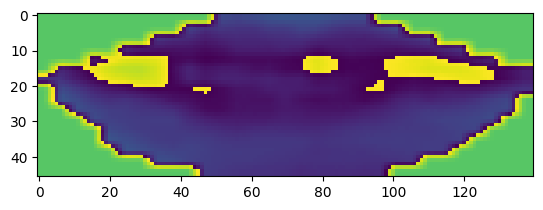

In [ ]:
plt.imshow(frames[46])

In [ ]:
alignments

<tf.Tensor: shape=(29,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 17, 39,  5,  9,  7,
        8, 20, 39, 19, 16, 39, 16, 12,  5,  1, 19,  5])>

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at q eight sp please'>

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def pad_alignments(alignments):
    # Pad the alignments to the desired shape
     padding_size = tf.maximum(0, 40 - tf.shape(alignments)[0])
     #return tf.pad(alignments, [[0, 40 - tf.shape(alignments)[0]]], constant_values=0)
     return tf.pad(alignments, [[0, padding_size]], constant_values=0)  # Assuming 0 is your padding value

In [ ]:
# def mappable_function(path:str) ->List[str]:
#     # print(f"Processing path: {path}")
#     result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
#     return result

In [ ]:
# def mappable_function(path: str):
#     frames, alignments = tf.py_function(load_data, [path], (tf.float32, tf.int64))
#     frames.set_shape((75, 46, 140, 1))  # Set the shape for frames


#     # Reshape alignments into a 1-D tensor to avoid the shape error
#     alignments = tf.reshape(alignments, [-1])  # Flatten the alignments

#     # Pad alignments here
#     padded_alignments = pad_alignments(alignments)
#     padded_alignments.set_shape((40,))  # Set the shape for padded alignments
#     return frames, padded_alignments


In [ ]:
def pad_alignments(alignments, max_length=40):
    # Pad alignments to the max_length with a pad value of 0
    paddings = [[0, max_length - tf.shape(alignments)[0]]]  # Pads to (max_length,)
    padded_alignments = tf.pad(alignments, paddings, "CONSTANT", constant_values=0)
    return padded_alignments

def mappable_function(path: str):
    frames, alignments = tf.py_function(load_data, [path], (tf.float32, tf.int64))

    # Set the shape for frames
    frames.set_shape((75, 46, 140, 1))

    # Squeeze the alignments to remove extra dimensions (e.g., if shape is [26, 1], it becomes [26])
    alignments = tf.squeeze(alignments)

    # Reshape alignments to avoid dimensionality issues (flatten to 1-D)
    alignments = tf.reshape(alignments, [-1])

    # Pad alignments to a fixed length of 40
    padded_alignments = pad_alignments(alignments, max_length=40)

    # Set the shape of padded alignments to (40,)
    padded_alignments.set_shape((40,))

    return frames, padded_alignments



In [ ]:
data = tf.data.Dataset.list_files('./data3/s1/*.mpg')
print(f"Number of video files found: {len(data)}")  # Should print 600 (this might not work directly)

Number of video files found: 600


In [ ]:
data = tf.data.Dataset.list_files('./data3/s1/*.mpg')
data = data.shuffle(300, reshuffle_each_iteration=True)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,46,140,1],[40]))
# for batch in data.take(1):
#     frames_batch, alignments_batch = batch
#     print(f"Batch shape: {frames_batch.shape}, Alignments shape: {alignments_batch.shape}")  # Debugging line
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(250)
test = data.skip(250)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.utils import split_dataset

# # Load the video files and shuffle
# data = tf.data.Dataset.list_files('./data/s1/*.mpg')
# data = data.shuffle(200, reshuffle_each_iteration=False)
# data = data.map(mappable_function)

# # Split the dataset into 70% train and 30% test
# train_data, test_data = split_dataset(data, right_size=0.3)

# # Apply batching and padding
# train = train_data.padded_batch(4, padded_shapes=([75,46,140,1],[40]))
# test = test_data.padded_batch(4, padded_shapes=([75,46,140,1],[40]))

# # Prefetch for performance optimization
# train = train.prefetch(tf.data.AUTOTUNE)
# test = test.prefetch(tf.data.AUTOTUNE)


In [ ]:
# import tensorflow as tf

# # Create dataset
# data = tf.data.Dataset.list_files('./data/s1/*.mpg')
# data = data.shuffle(600, reshuffle_each_iteration=False)
# data = data.map(mappable_function)

# # Split before batching
# train = data.take(500)  # 500 for training
# test = data.skip(500)   # 100 for testing

# # Check sizes before batching
# # print("Number of examples in training before batching:", sum(1 for _ in train))
# # print("Number of examples in testing before batching:", sum(1 for _ in test))

# # Apply padded_batch after splitting
# train = train.padded_batch(2, padded_shapes=([75, 46, 140, 1], [40]))
# test = test.padded_batch(2, padded_shapes=([75, 46, 140, 1], [40]))

# # Prefetching
# train = train.prefetch(tf.data.AUTOTUNE)
# test = test.prefetch(tf.data.AUTOTUNE)

# # Check sizes after batching
# # print("Size of training set after batching:", sum(1 for _ in train))
# # print("Size of testing set after batching:", sum(1 for _ in test))

In [ ]:
len(test)

50

In [ ]:
len(train)

250

In [ ]:
# # Assuming train and test are datasets yielding (inputs, labels) tuples
# for x, y in train.take(1):  # Take one batch from the training dataset
#     print(f"Train input shape: {x.shape}, Train label shape: {y.shape}")

# for x, y in test.take(1):  # Take one batch from the testing dataset
#     print(f"Test input shape: {x.shape}, Test label shape: {y.shape}")



In [ ]:
# print(f"Shape of frames before batching: {[frame.shape for frame in frames]}")

In [ ]:
frames, alignments = data.as_numpy_iterator().next()

In [ ]:
len(frames)

2

In [ ]:
print("Shape of frames:", frames.shape)

Shape of frames: (2, 75, 46, 140, 1)


In [ ]:
# import imageio

# import numpy as np

# # Assume frames are obtained from your dataset
# sample = data.as_numpy_iterator()
# val = sample.next(); val[0]
# # frames = val[0][0]  # Extracting frames

# # # Add this line to check the shape of the frames tensor
# # print("Shape before reshaping:", frames.shape)

# # # Reshape to combine the batch and frames
# # # reshaped_frames = frames.reshape(-1, 41, 120)  # Combine the batch and frames into one dimension

# # # Reshape only if the number of elements matches
# # if frames.shape[0] * frames.shape[1] * frames.shape[2] * frames.shape[3] == 483000:
# #     reshaped_frames = frames.reshape(-1, 46, 140)
# # else:
# #     raise ValueError(f"Unexpected shape: {frames.shape}, unable to reshape.")



# # # Check and convert the frames to a suitable format
# # reshaped_frames = (reshaped_frames * 255).astype(np.uint8)  # Normalize to 0-255 if needed

# # Save the frames as a GIF
# frames = val[0][0]  # Get the first batch of frames

# # Reshape and convert to uint8
# reshaped_frames = frames[0]  # Get the first video
# reshaped_frames = np.squeeze(reshaped_frames)  # Remove channel dimension
# reshaped_frames = (reshaped_frames * 255).astype(np.uint8)  # Normalize to 0-255
# reshaped_frames = reshaped_frames.reshape(-1, 46, 140)  # Ensure shape is correct

# # Save the frames as a GIF
# imageio.mimsave('./animation.gif', reshaped_frames, fps=10)

In [ ]:
import imageio
import numpy as np

# Assume frames are obtained from your dataset
sample = data.as_numpy_iterator()
val = sample.next()
frames, alignments = sample.next()  # Get frames and alignments

print("Shape of frames:", frames.shape)  # Should print (2, 75, 46, 140, 1)

# Iterate through each video in the batch
for video_idx in range(frames.shape[0]):
    video_frames = frames[video_idx]  # Extract frames for the current video
    print(f"Shape of video {video_idx} frames:", video_frames.shape)  # Should print (75, 46, 140, 1)

    # Squeeze to remove the last dimension (channel), so frames have shape (75, 46, 140)
    reshaped_frames = np.squeeze(video_frames, axis=-1)  # Shape becomes (75, 46, 140)
    print("Shape after squeezing:", reshaped_frames.shape)  # Should print (75, 46, 140)

    # Normalize to 0-255 if needed for image representation
    reshaped_frames = (reshaped_frames * 255).astype(np.uint8)

    # Create a list of frames (2D images) for the GIF
    frames_list = [reshaped_frames[i] for i in range(reshaped_frames.shape[0])]

    # Save the frames as a GIF
    imageio.mimsave(f'./animation_video_{video_idx}.gif', frames_list, fps=10)

print("GIFs saved successfully!")


Shape of frames: (2, 75, 46, 140, 1)
Shape of video 0 frames: (75, 46, 140, 1)
Shape after squeezing: (75, 46, 140)
Shape of video 1 frames: (75, 46, 140, 1)
Shape after squeezing: (75, 46, 140)
GIFs saved successfully!


In [ ]:
# import imageio
# import numpy as np

# # Assume frames are obtained from your dataset
# sample = data.as_numpy_iterator()
# val = sample.next()
# frames = val[0]  # Extract the frames from the batch

# # The shape of frames is (75, 46, 140, 1), 75 frames of size 46x140 with 1 channel
# print("Original shape of frames:", frames.shape)  # Should print (75, 46, 140, 1)

# # Squeeze to remove the last dimension (channel), so frames have shape (75, 46, 140)
# reshaped_frames = np.squeeze(frames, axis=-1)  # Remove the last channel dimension
# print("Shape after squeezing:", reshaped_frames.shape)  # Should print (75, 46, 140)

# # Ensure values are normalized for proper image representation (scale to 0-255)
# reshaped_frames = (reshaped_frames * 255).astype(np.uint8)

# # Check shape of the first individual frame to confirm it's (46, 140)
# print("Shape of the first individual frame:", reshaped_frames[0].shape)  # Should print (46, 140)

# # Create a list of frames (2D images) for the GIF
# frames_list = [reshaped_frames[i] for i in range(reshaped_frames.shape[0])]

# # Save the frames as a GIF
# imageio.mimsave('./animation2.gif', frames_list, fps=10)

# print("GIF saved successfully!")




In [ ]:
# import imageio
# import numpy as np

# # Assume frames are obtained from your dataset
# sample = data.as_numpy_iterator()
# val = sample.next()  # Getting the next batch of frames

# # Extracting frames
# frames = val[0][0]  # Get the first batch of frames

# # Check shape of frames
# print("Shape of frames:", frames.shape)  # Should be (75, 46, 140, 1)

# # Squeeze the last dimension (channel dimension) if needed
# reshaped_frames = np.squeeze(frames)  # Now shape will be (75, 46, 140)

# # Ensure shape is correct for saving as GIF
# # Here, we flatten the first dimension (75 frames)
# reshaped_frames = reshaped_frames.reshape(-1, 46, 140)  # This should work as it will be (75, 46, 140)

# # Normalize to 0-255
# reshaped_frames = (reshaped_frames * 255).astype(np.uint8)

# # Save the frames as a GIF
# imageio.mimsave('./animation.gif', reshaped_frames, fps=10)


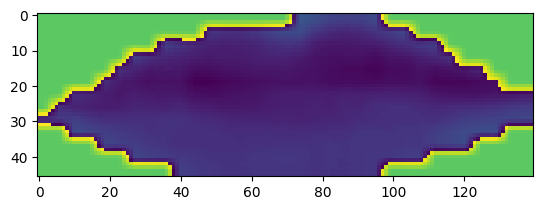

In [ ]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][13])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue by e two now'>

Deep Neural Network

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

# Convolutional layers
model.add(Conv3D(128, 3, input_shape=(75, 46, 140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1, 2, 2)))

# Flatten the output of the convolutional layers for LSTM input
# Flatten and reshape
model.add(TimeDistributed(Flatten()))  # Output shape will be (None, 75, 11*35*75)

# Reshape to (batch_size, timesteps, features)
model.add(Reshape((75, 6375)))



# No additional reshape needed; the output shape will be (None, 75, 6375)
# Proceed directly to LSTM layers
model.add(Bidirectional(LSTM(64, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(64, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))



# Optionally print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 75, 46, 140, 128)    │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 75, 46, 140, 128)    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 75, 23, 70, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 75, 23, 70, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 75, 23, 70, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 75, 11, 35, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 75, 11, 35, 75)      │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 75, 11, 35, 75)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 75, 5, 17, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 75, 6375)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 6375)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 128)             │       3,297,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 75, 41)              │           5,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,808,436 (18.34 MB)

 Trainable params: 4,808,436 (18.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Originallllll not need to runnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
# model = Sequential()
# model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1,2,2)))

# model.add(Conv3D(256, 3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1,2,2)))

# model.add(Conv3D(75, 3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1,2,2)))

# model.add(TimeDistributed(Flatten()))

# model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
# model.add(Dropout(.5))

# model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
# model.add(Dropout(.5))

# model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [ ]:
# temp_output = model.layers[7].output  # Adjust the index based on your model's layer structure
# print("Output shape after Flatten:", temp_output.shape)

In [ ]:
print(val[0].shape)

(2, 75, 46, 140, 1)


In [ ]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'666666666666666666666666666666666666666dddddd6666666666dddd6666666666666666'>

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'666666666666666666666666666666666666666dddddd6666666666dddd6666666666666666'>

In [ ]:
model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 41)

Setup and training

In [ ]:
# def scheduler(epoch, lr):
#     if epoch < 30:
#         return lr
#     elif epoch < 60:
#         return lr * 0.5  # Reduce by half after 30 epochs
#     else:
#         return lr * 0.25  # Further reduce by half after 60 epochs


In [ ]:
def scheduler(epoch, lr):
    if epoch < 60:
        return lr * 1.25  # Increase by 25% before epoch 60
    elif 60 <= epoch < 80:
        return lr * 0.5  # Reduce to half between epochs 60-80
    elif 80 <= epoch < 100:
        return lr * 0.75  # Slow down the reduction after epoch 80
    else:
        return lr * 0.9  # Minimal reduction after epoch 100


In [ ]:
# def scheduler(epoch, lr):
#     if epoch < 60:
#         return lr * 1.25  # Increase the current learning rate by 25% from 42 to 60 epochs
#     else:
#         return lr * 0.5  # Reduce by a quarter after 60 epochs


In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
# def CTCLoss(y_true, y_pred):
#     batch_len = tf.shape(y_true)[0]
#     input_length = tf.shape(y_pred)[1]  # max_time_steps
#     label_length = tf.shape(y_true)[1]  # max_label_length

#     # Create tensors with the same length for all samples in the batch
#     input_length = input_length * tf.ones(shape=(batch_len,), dtype=tf.int32)
#     label_length = label_length * tf.ones(shape=(batch_len,), dtype=tf.int32)

#     # Debugging shapes
#     print("y_true shape: ", tf.shape(y_true))
#     print("y_pred shape: ", tf.shape(y_pred))
#     print("input_length shape: ", tf.shape(input_length))
#     print("label_length shape: ", tf.shape(label_length))

#     # Compute CTC loss
#     loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)

#     return loss



In [ ]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [ ]:
# checkpoint_callback = ModelCheckpoint(os.path.join('models', 'checkpoint.weights.h5'), monitor='loss', save_weights_only=True)

In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

In [ ]:
example_callback = ProduceExample(test)

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Create a checkpoint callback to save the model weights every epoch
# checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint(3).weights.h5',
#                                       save_weights_only=True,
#                                       save_freq='epoch',  # Save every epoch
#                                       verbose=1)

In [ ]:
# class CustomCheckpointCallback(tf.keras.callbacks.Callback):
#     def __init__(self, filepath, save_freq):
#         super(CustomCheckpointCallback, self).__init__()
#         self.filepath = filepath
#         self.save_freq = save_freq

#     def on_epoch_end(self, epoch, logs=None):
#         # Check if we are at the right epoch to save the model
#         if (epoch + 1) % self.save_freq == 0:
#             self.model.save_weights(self.filepath)
#             print(f"Checkpoint saved at epoch {epoch + 1}")

# # Instantiate the custom callback
# custom_checkpoint_callback = CustomCheckpointCallback(filepath='model_checkpoint(3).weights.h5', save_freq=2)

In [ ]:


class CustomCheckpointCallback(tf.keras.callbacks.Callback):
    def __init__(self, filepath_template, save_freq):
        super(CustomCheckpointCallback, self).__init__()
        self.filepath_template = filepath_template  # Template for file paths, e.g. 'model_epoch-{epoch}.h5'
        self.save_freq = save_freq
        self.best_val_loss = float('inf')  # Initialize to a very large value
        self.best_epoch = None  # To keep track of the best epoch

    def on_epoch_end(self, epoch, logs=None):
        # Check if we are at the right epoch to save the model
        if (epoch + 1) % self.save_freq == 0:
            filepath = self.filepath_template.format(epoch=epoch + 1)
            self.model.save_weights(filepath)
            print(f"Checkpoint saved at epoch {epoch + 1}: {filepath}")

        # Track the best validation loss and the corresponding epoch
        current_val_loss = logs.get('val_loss')
        if current_val_loss is not None and current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.best_epoch = epoch + 1  # +1 because epoch count starts at 0

    def on_train_end(self, logs=None):
        if self.best_epoch is not None:
            print(f"\nBest validation loss of {self.best_val_loss:.4f} occurred at epoch {self.best_epoch}")

# Instantiate the custom callback
custom_checkpoint_callback = CustomCheckpointCallback(
    filepath_template='model_new_epoch-{epoch}.weights.h5',
    save_freq=1  # Save after every epoch
)


In [ ]:
# import numpy as np

# # Levenshtein distance function (edit distance between two sequences)
# def levenshtein_distance(seq1, seq2):
#     dp = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)

#     for i in range(1, len(seq1) + 1):
#         dp[i][0] = i
#     for j in range(1, len(seq2) + 1):
#         dp[0][j] = j

#     for i in range(1, len(seq1) + 1):
#         for j in range(1, len(seq2) + 1):
#             if seq1[i - 1] == seq2[j - 1]:
#                 dp[i][j] = dp[i - 1][j - 1]
#             else:
#                 dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

#     return dp[-1][-1]


In [ ]:
# import tensorflow as tf

# class CTCCustomAccuracyCallback(tf.keras.callbacks.Callback):
#     def __init__(self, validation_data):
#         self.validation_data = validation_data

#     def on_epoch_end(self, epoch, logs=None):
#         total_cer = 0
#         total_wer = 0
#         num_sequences = 0

#         for batch in self.validation_data:
#             x, y_true = batch  # Extract input and labels
#             y_pred = self.model.predict(x)  # Get model's prediction

#             # Decode the CTC predictions
#             decoded_pred, _ = tf.keras.backend.ctc_decode(
#                 y_pred,
#                 input_length=tf.fill([y_pred.shape[0]], y_pred.shape[1])
#             )
#             decoded_pred = tf.keras.backend.get_value(decoded_pred[0])

#             # Convert true sequences to a list format
#             y_true = tf.keras.backend.get_value(y_true)

#             # Calculate CER and WER for this batch
#             cer_batch, wer_batch = self.calculate_error_rates(decoded_pred, y_true)
#             total_cer += cer_batch
#             total_wer += wer_batch
#             num_sequences += len(y_true)

#         # Compute average CER and WER for this epoch
#         avg_cer = total_cer / num_sequences
#         avg_wer = total_wer / num_sequences

#         print(f'Epoch {epoch + 1} - CER: {avg_cer * 100:.2f}%, WER: {avg_wer * 100:.2f}%')

#     def calculate_error_rates(self, decoded_pred, true_sequences):
#         total_cer = 0
#         total_wer = 0

#         for pred, true_seq in zip(decoded_pred, true_sequences):
#             # Convert the predictions and true sequences to a list of characters/words
#             pred_str = ''.join(map(str, pred)).strip()  # Strip padding or blank characters
#             true_str = ''.join(map(str, true_seq)).strip()

#             # CER (Character Error Rate)
#             cer = levenshtein_distance(pred_str, true_str) / max(len(true_str), 1)
#             total_cer += cer

#             # WER (Word Error Rate)
#             pred_words = pred_str.split()
#             true_words = true_str.split()
#             wer = levenshtein_distance(pred_words, true_words) / max(len(true_words), 1)
#             total_wer += wer

#         return total_cer, total_wer


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
# from tensorflow.keras.optimizers import Adam
# import tensorflow as tf

# # Define the model architecture
# model = Sequential()

# # Convolutional layers
# model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1, 2, 2)))

# model.add(Conv3D(256, 3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1, 2, 2)))

# model.add(Conv3D(75, 3, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPool3D((1, 2, 2)))

# # Flatten and reshape
# model.add(TimeDistributed(Flatten()))  # Output shape will be (None, 75, 11*35*75)
# model.add(Reshape((75, 6375)))

# # LSTM layers
# model.add(Bidirectional(LSTM(64, kernel_initializer='Orthogonal', return_sequences=True)))
# model.add(Dropout(0.5))

# model.add(Bidirectional(LSTM(64, kernel_initializer='Orthogonal', return_sequences=True)))
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))

# # Optionally print the model summary
# model.summary()

# Define early stopping callback with mode and patience
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,               # Stop if no improvement for 5 epochs
    restore_best_weights=True, # Restore weights from best epoch
    mode='min',                # We want to minimize validation loss
    verbose=1                  # Print a message when stopping
)

# #Load the saved weights from the last checkpoint
model.load_weights('model_new_epoch-70.weights.h5')

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

# # Add the custom accuracy callback to the list
# #accuracy_callback = CTCCustomAccuracyCallback(validation_data=test)

# # Continue training from the 44th epoch onward
# model.fit(train,
#           validation_data=test,
#           epochs=130,
#           initial_epoch=71,  # Start from the 8th epoch
#           callbacks=[custom_checkpoint_callback, early_stopping, example_callback, schedule_callback])

In [ ]:
# Load the model from the last checkpoint
#model.load_weights('model_checkpoint.h5')

# Continue training from the last saved epoch

In [ ]:
#model.fit(train, validation_data=test, epochs=15, callbacks=[checkpoint_callback, schedule_callback, example_callback])

In [ ]:
# # Iterate over a small test dataset to speed up testing
# small_test = test.take(1)  # Reduce the test data size for debugging
# test_data = small_test.as_numpy_iterator()

In [ ]:
# # Get next sample
# sample_v = test_data.next()

In [ ]:
# # Make predictions
# yhat = model.predict(sample_v[0], verbose=1)

In [ ]:
# # Real Text
# print('~'*100, 'REAL TEXT')
# real_texts = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample_v[1]]
# for text in real_texts:
#     print(text.numpy().decode('utf-8'))

In [ ]:
# # Decode predictions
# decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75, 75], greedy=True)[0][0].numpy()

In [ ]:
# # Predicted Text
# print('~'*100, 'PREDICTIONS')
# pred_texts = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]
# for text in pred_texts:
#     print(text.numpy().decode('utf-8'))

In [ ]:
import numpy as np
import tensorflow as tf
from jiwer import wer  # Install jiwer library for WER calculation
import editdistance  # Install editdistance library for CER calculation

# Function to calculate Character Error Rate (CER)
def calculate_cer(pred, truth):
    pred = pred.replace(' ', '')  # Remove spaces for character-level comparison
    truth = truth.replace(' ', '')
    return editdistance.eval(pred, truth) / len(truth)

# Function to calculate Word Error Rate (WER)
def calculate_wer(pred, truth):
    return wer(truth, pred)

# Iterate over a small test dataset to speed up testing
small_test = test.take(1)  # Reduce the test data size for debugging
test_data = small_test.as_numpy_iterator()

# Get next sample
sample_v = test_data.next()

# Make predictions
yhat = model.predict(sample_v[0], verbose=1)

# Real Text (Ground Truth)
print('~'*100, 'REAL TEXT')
real_texts = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample_v[1]]
real_texts = [text.numpy().decode('utf-8') for text in real_texts]
for text in real_texts:
    print(text)

# Decode predictions
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75, 75], greedy=True)[0][0].numpy()

# Predicted Text
print('~'*100, 'PREDICTIONS')
pred_texts = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]
pred_texts = [text.numpy().decode('utf-8') for text in pred_texts]
for text in pred_texts:
    print(text)

# Calculate and print CER and WER
total_cer = 0
total_wer = 0

for real_text, pred_text in zip(real_texts, pred_texts):
    cer = calculate_cer(pred_text, real_text)
    wer_value = calculate_wer(pred_text, real_text)

    print(f"REAL: {real_text}")
    print(f"PRED: {pred_text}")
    print(f"CER: {cer:.4f}, WER: {wer_value:.4f}")
    print('~' * 100)

    total_cer += cer
    total_wer += wer_value

# Averaging CER and WER over all sentences
avg_cer = total_cer / len(real_texts)
avg_wer = total_wer / len(real_texts)

print(f"Average CER: {avg_cer:.4f}")
print(f"Average WER: {avg_wer:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT
lay blue with v eight soon
bin blue at y two please
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS
lay blue with v eight soon
bin blue at two please
REAL: lay blue with v eight soon
PRED: lay blue with v eight soon
CER: 0.0000, WER: 0.0000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
REAL: bin blue at y two please
PRED: bin blue at two please
CER: 0.0526, WER: 0.1667
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Average CER: 0.0263
Average WER: 0.0833


In [ ]:
# Testing with another sample (from file)
sample_v = load_data(tf.convert_to_tensor('./data/s1/bbao8p.mpg'))

In [ ]:
# Real text of this sample
print('~'*100, 'REAL TEXT')
real_sample_text = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample_v[1]]]
for text in real_sample_text:
    print(text.numpy().decode('utf-8'))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT
bin blue at o eight please


In [ ]:
# Predict for the new sample
yhat = model.predict(tf.expand_dims(sample_v[0], axis=0), verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
# Decode predictions
decoded_sample = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()


In [ ]:
# Predicted text of this sample
print('~'*100, 'PREDICTIONS')
pred_sample_text = [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded_sample]
for text in pred_sample_text:
    print(text.numpy().decode('utf-8'))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS
bin blue ait ih please
